# Data Science Nanodegree - Blog Post
Created By: Renan Vieira Dias  
https://review.udacity.com/#!/rubrics/1507/view

--- 

### Titles For The Article:

 - KeyWords: Data, Job, Work, Employ, Skills, Language, Salary, Experience, Seniority, Languages, Database, Technologies 
 - Brain Storm:
    - Requirements for Data Jobs
    - Data Jobs tools
    - What Data tells about Data Jobs
    - How much each skill is worth it on data
    - Technologies for Data Analyst, Data Science, Data Engineer, Database Administrator
    - Technologies for Data Jobs



### Questions
  
- **Which skills and technologies each data job require?**  
    The goal with this question is to understand which Languages, Databases, Platforms, Web Framework and Dev Enviroment is used by each data job. The questions on the survey that contains this information are: *['LanguageWorkedWith', 'DatabaseWorkedWith', 'PlatformWorkedWith', 'WebFrameWorkedWith', 'MiscTechWorkedWith', 'DevEnviron', 'OpSys']*
 
 
- **How is the distribution of Salary, for each type of data job in the top 10 countries?**  
    It is important to understand the salary range for your profession, and the segment of country should be included because of the difference on the cost of living of each country. The information is on the foolowing questions: *['ConvertedComp', 'WorkWeekHrs']*. The segment is *['Country']*
  
  
- **How much is worth each skill/technology/education in dollar per hours?**  
    The goal is to understand how much each skill/technology/education is worth. Every article of datascience should include a model, so we will make a supervised model that explains the salary of each one. The target will be made on **Dollar per hour**: *['ConvertedComp', 'WorkWeekHrs']*. While the features will be only the subset of skill/technology/education, years of experience and country: *['YearsCodePro', 'Country', 'EdLevel', 'LanguageWorkedWith', 'DatabaseWorkedWith', 'PlatformWorkedWith', 'WebFrameWorkedWith', 'MiscTechWorkedWith', 'DevEnviron', 'OpSys']*

#### Segment and Filter  
    Our Study will be focused only on data developers: *['Data or business analyst', 'Data scientist or machine learning specialist', 'Database administrator', 'Engineer, data']* and on the employed developers: *['Employed full-time','Employed part-time']*

### Article Intro
    Are you in a data carrear path? You love to extract, transform and load data? Organize its storage? Undestand what it is telling you about your business? Creating models on it? And are you not shure about what you should be learning or the tecnologies you should master? You are not alone. Fortunately Stack Overflow is here to help us again, actually its survey data from 2019.
  
---

### Imports

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import MinMaxScaler

C:\Users\renan\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Defined Functions

In [2]:
def optionIsInCell(cell, option):
    if str(cell).find(option)!=-1:
        return 1
    return 0

In [3]:
def transformingColumnByOptions(df, column, options, prefix = False, separator='_'):
    for each in options:
        new_column = column + separator + each if prefix else each
        df[new_column] = df[column].apply(optionIsInCell, option = each)
    return df

In [4]:
def isOneOfTheList(x, list_options):
    for each in list_options:
        if each in x:
            return True
    return False

In [5]:
def getOptionOfMultipleSelection(df, column, separator = ';'):
    flat_list = []
    for sublist in df[column].dropna().str.split(pat=separator, expand=False):
        for item in sublist:
            if item not in flat_list:
                flat_list.append(item)
    return flat_list

In [6]:
# Creating the data jobs Categories
def dataJobsClassificationMicro(DevType):
    for interest in devtype_interest:
        if interest == DevType:
            return interest
    for interest in devtype_interest:
        if interest in DevType:
            for not_interest in devtype_not_interest:
                if not_interest in DevType:
                    return 'Data Partialy'
            return 'Data Misture'
    return 'Not Data'

In [7]:
def dataJobsClassificationMacro(DevType):
    for interest in devtype_interest:
        if interest == DevType:
            return 'Data Job'
    for interest in devtype_interest:
        if interest in DevType:
            for not_interest in devtype_not_interest:
                if not_interest in DevType:
                    return 'Data Partialy'
            return 'Data Job'
    return 'Not Data'

In [24]:
def colourMap(proportion):
    if proportion < 0.05:
        return (0.7, 0.0, 0.0, 1)
    elif proportion < 0.20:
        return (0.5, 0.0, 0.2, 1)
    elif proportion < 0.40:
        return (0.3, 0.0, 0.4, 1)
    elif proportion < 0.60:
        return (0.1, 0.0, 0.6, 1)
    elif proportion < 0.80:
        return (0.0, 0.0, 0.5, 1)
    else:
        return (0.0, 0.5, 0.0, 1)
    return 'error'

In [33]:
def cleaningYearsOfCode(text):
    if text == 'Less than 1 year':
        return 0.5
    elif text == 'More than 50 years':
        return 55
    return text

### Reading Data Files

In [9]:
df_raw = pd.read_csv('survey_results_public.csv')
df_schema = pd.read_csv('survey_results_schema.csv')

### Filtering Employee  
We are only interested on those that are employed. This part will filter then.
The columns is **'Employment'**, the question on the survey was *Which of the following best describes your current employment status?* and the answers we are seeking are: *['Employed full-time', 'Employed part-time']*

In [10]:
df = df_raw[ df_raw['Employment'].isin(['Employed full-time','Employed part-time']) ]

### Transforming Columns & Decoding  
For each column, discover which answers multi-options could be selected. Then decode each column multi-option to a quantity of options columns.

In [11]:
columnsOptions = {}
columnsToGetOptions =[
        'DevType'
        ,'EdLevel'
        ,'LanguageWorkedWith'
        ,'DatabaseWorkedWith'
        ,'PlatformWorkedWith'
        ,'WebFrameWorkedWith'
        ,'MiscTechWorkedWith'
        ,'DevEnviron'
        ,'OpSys'
    ]

# Creating an dictionary of the columns options
for each in columnsToGetOptions:
    tempList = getOptionOfMultipleSelection(df,each)
    tempList.sort()
    columnsOptions[each] = tempList

# Creating each skill columns
for questionColumn in columnsToGetOptions:
    df = transformingColumnByOptions(df, questionColumn, columnsOptions[questionColumn])

C:\Users\renan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


### Segmenting Data Jobs  
We are interested on data Jobs. So Lets create those categories. The columns is **'DevType'**, the question on the survey was *Which of the following describe you? Please select all that apply.* and the answers we are seeking are: *['Data or business analyst', 'Data scientist or machine learning specialist', 'Database administrator', 'Engineer, data']*

In [12]:
# A list of each data we are interested in
devtype_interest = [
    'Data or business analyst'
    ,'Data scientist or machine learning specialist'
    ,'Database administrator'
    ,'Engineer, data'
]

# Getting a list of the other jobs
devtype_not_interest = []
for each in columnsOptions['DevType']:
    if not each in devtype_interest:
        devtype_not_interest.append(each)

# A list of the classification of a DevType
dataJobsOutputs = [
    'Data or business analyst'
    ,'Data scientist or machine learning specialist'
    ,'Database administrator'
    ,'Engineer, data'
    ,'Data Misture'
    ,'Data Partially'
    ,'Not Data'
]

# Cleaning dataframe from no answer of devtype
df = df.dropna(subset = ['DevType']).copy()

# Defining devtype on the dataJobsOutputs classification
df['datajobsCategoryMicro'] = df['DevType'].apply( dataJobsClassificationMicro )
df['datajobsCategoryMacro'] = df['DevType'].apply( dataJobsClassificationMacro )

### Understanding the dataset volume of answer by job
Below we can see that we only a few hundreds of each data job type. While there some thousands that are partially on this classification

In [13]:
df['datajobsCategoryMicro'].value_counts()

Not Data                                         51562
Data Partialy                                    14268
Data Misture                                       524
Data scientist or machine learning specialist      485
Data or business analyst                           378
Engineer, data                                     261
Database administrator                              84
Name: datajobsCategoryMicro, dtype: int64

## Question 1: Which skills and technologies each data job require?

### Article structure for each data job
    There are several jobs that works with data, but our interest lays on those that have the main objective to storage it or to analyse it. The data jobs from the survey are: 'Data or business analyst', 'Data scientist or machine learning specialist', 'Database administrator' and 'Engineer, data'. For each of these jobs there are main Programming Language they use, the databases they work on, the platforms, Web Framework, the development enviroment, the operational system they work on and some other technologies. And for each of those, there is it frequency on the market that varies from: Extremely specific ([0%,5%[ of use in the market), only for specifics uses ([5%,20%[), good to know ([20%,40%[), should know ([40%,60%[), Must Know ([60%,80%[), Not a option ([80%,100%]).
    Follow below witch skills you should know, and for those you don't know yet, just click in the link next to it to learn a little about it.

### Ploting every skill category by job segment (Micro and Macro)

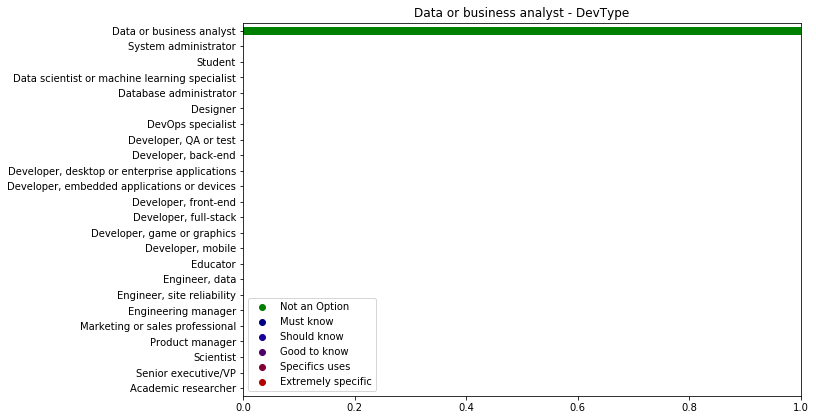

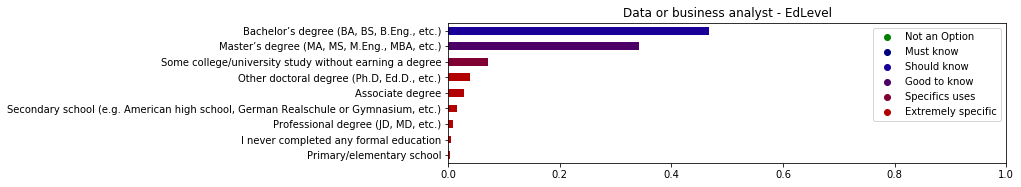

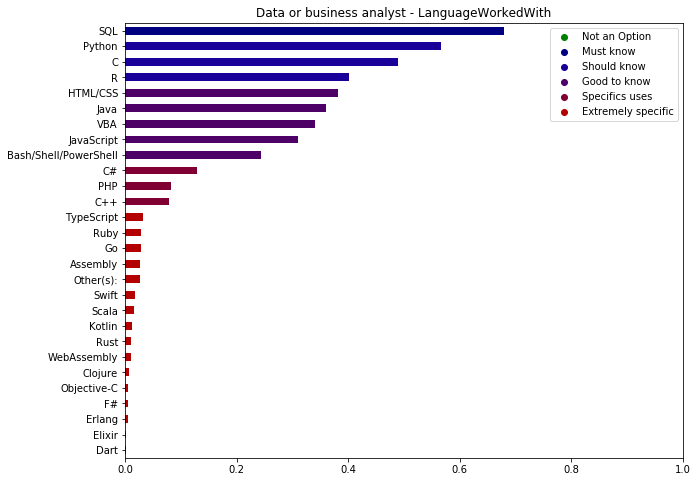

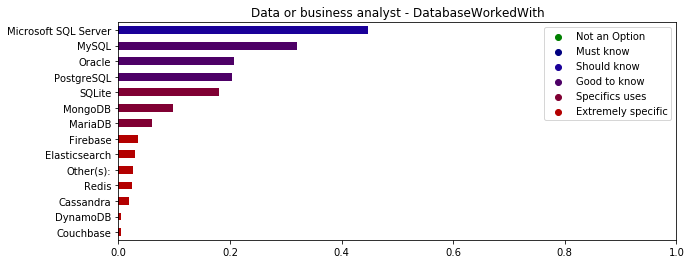

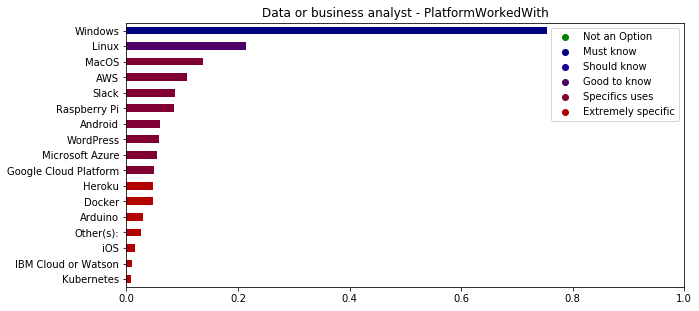

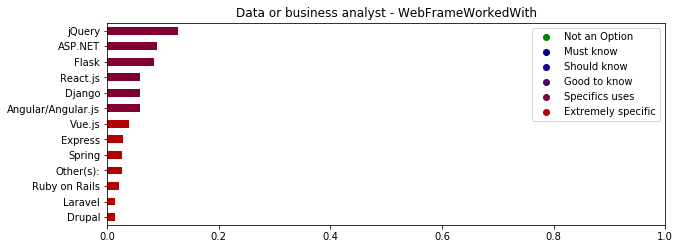

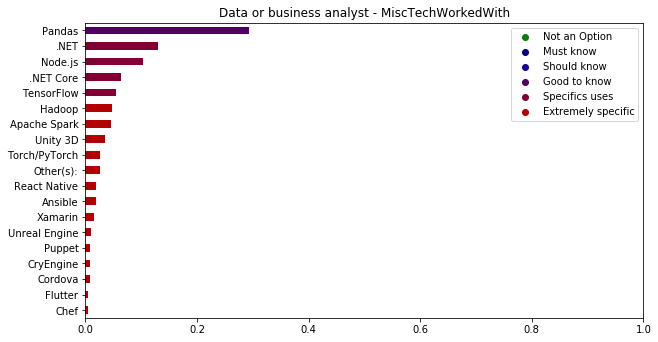

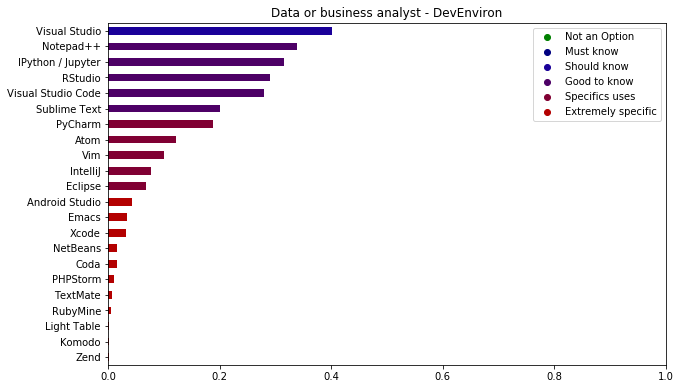

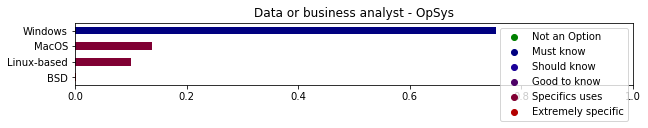

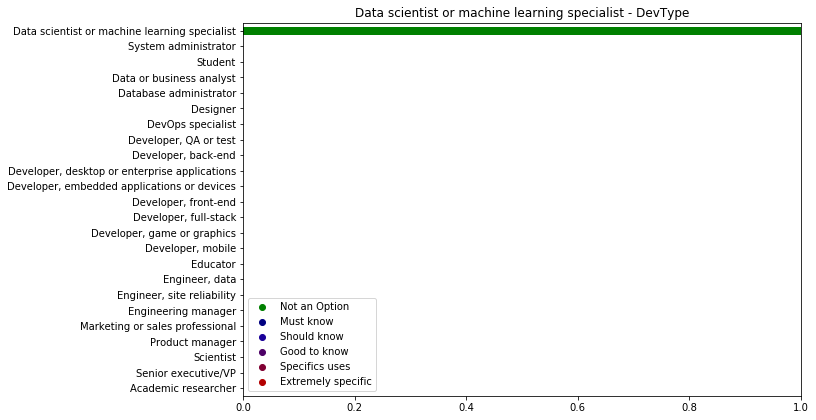

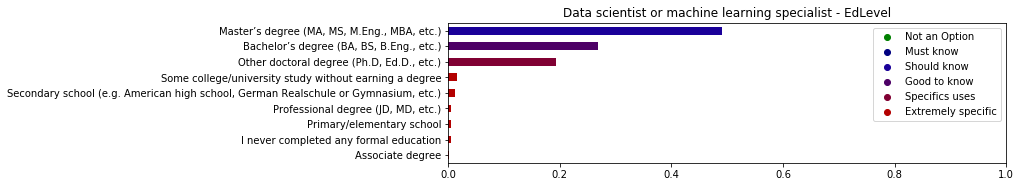

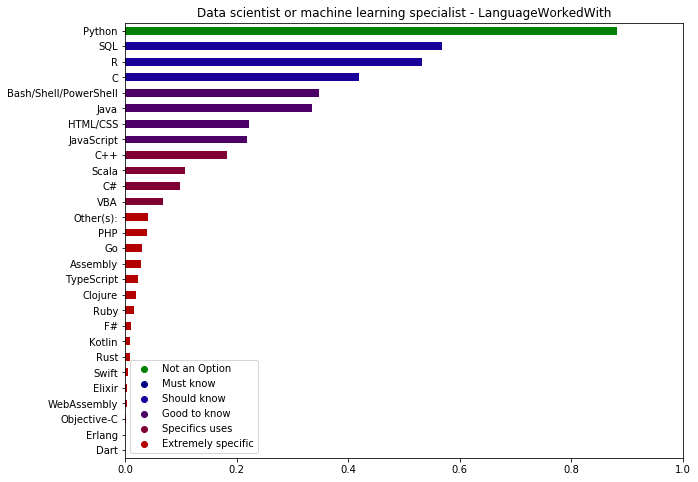

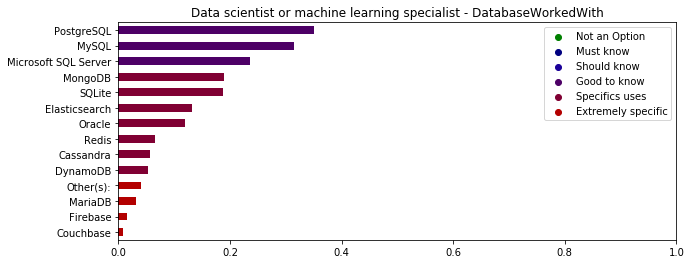

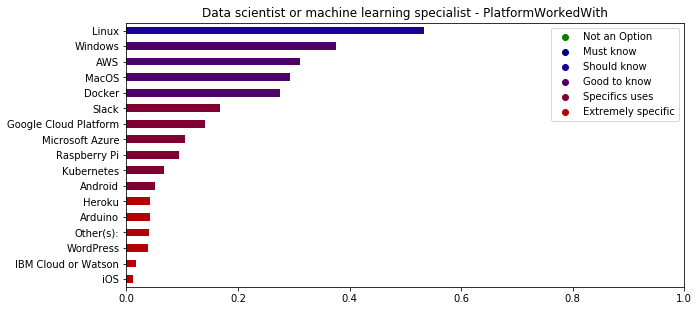

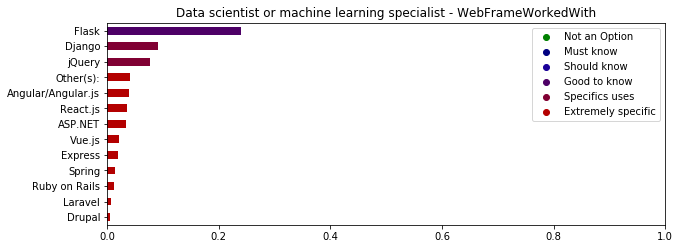

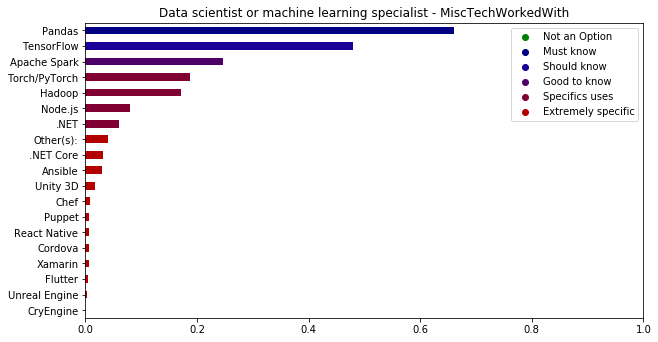

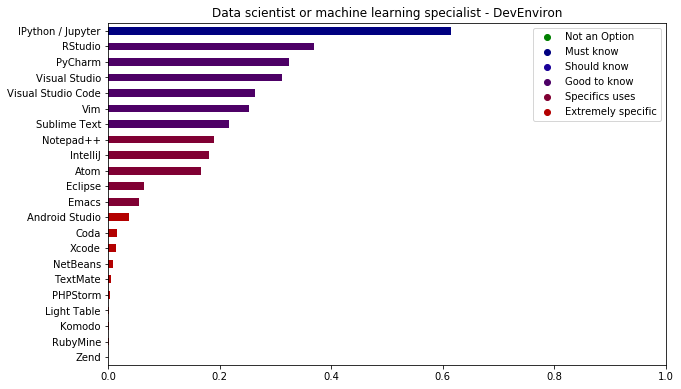

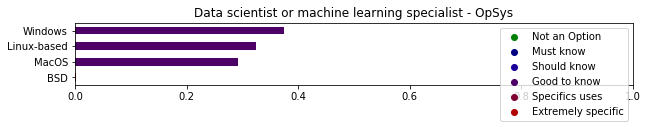

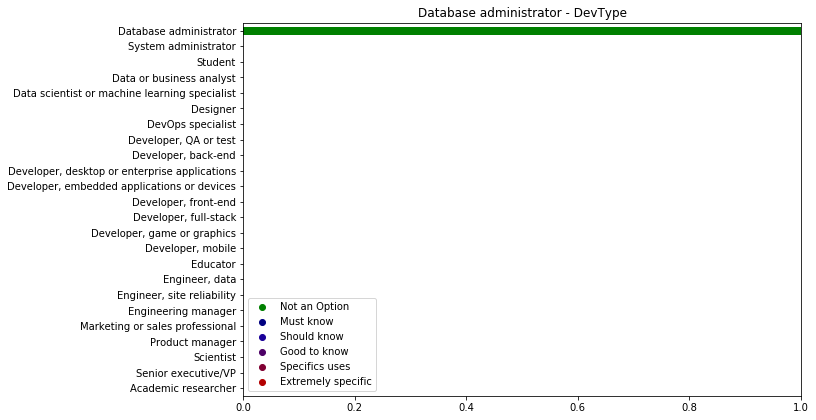

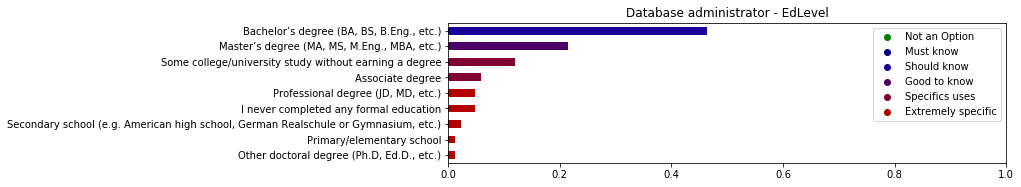

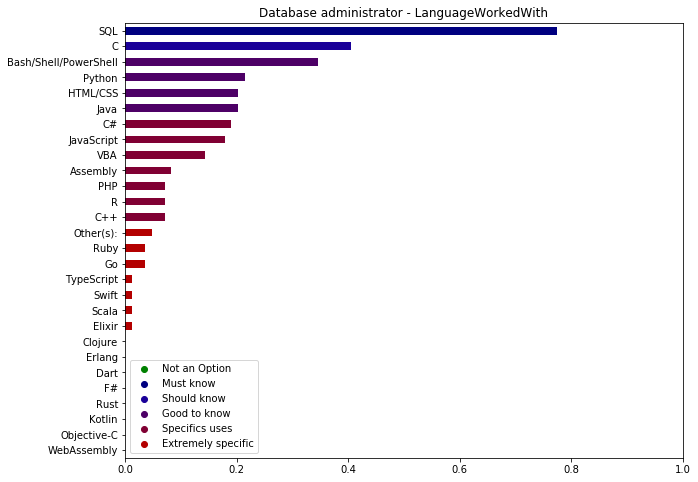

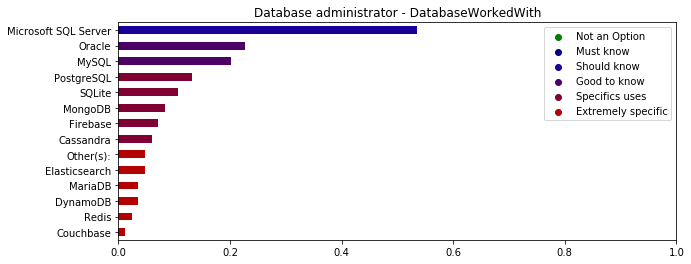

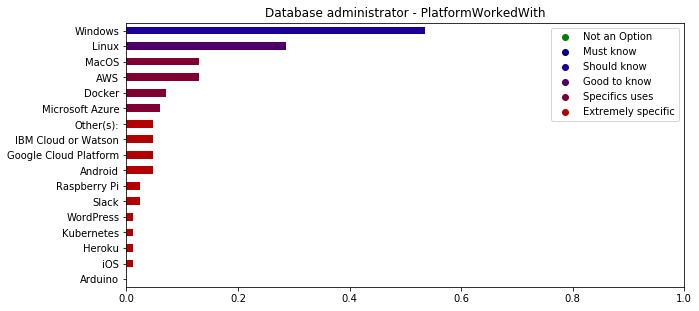

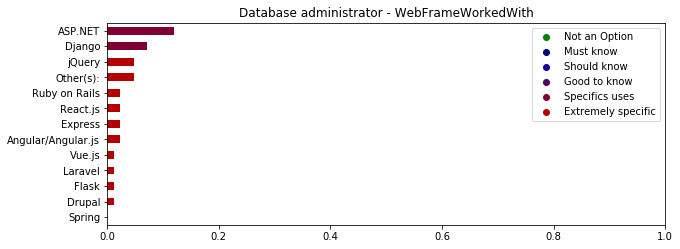

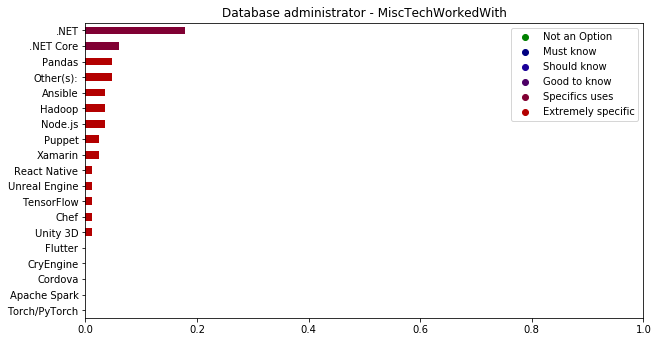

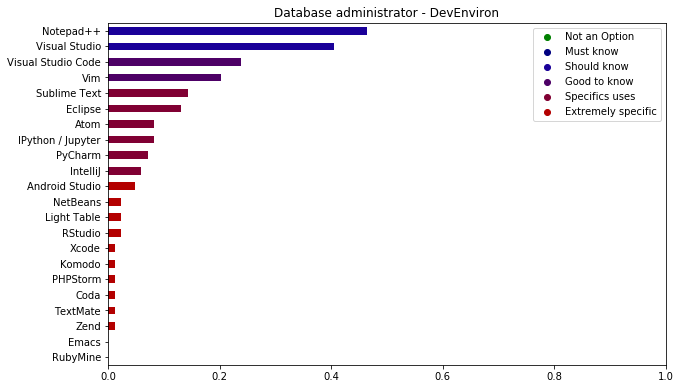

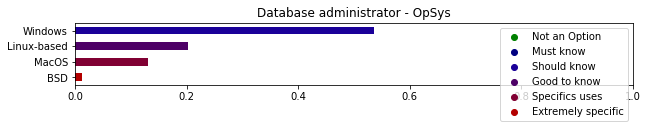

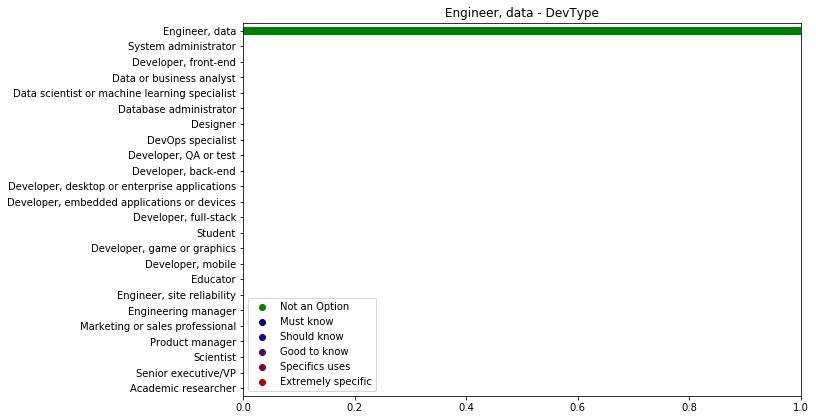

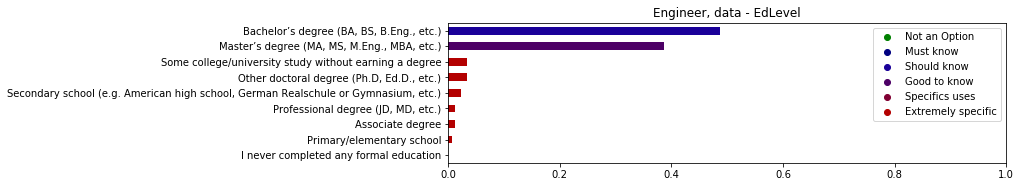

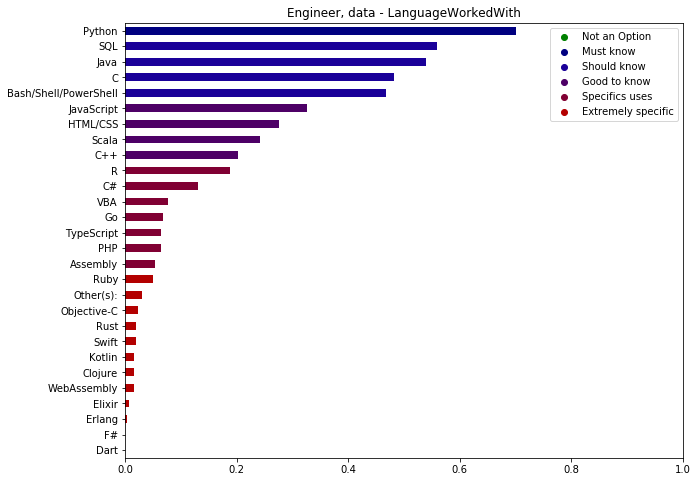

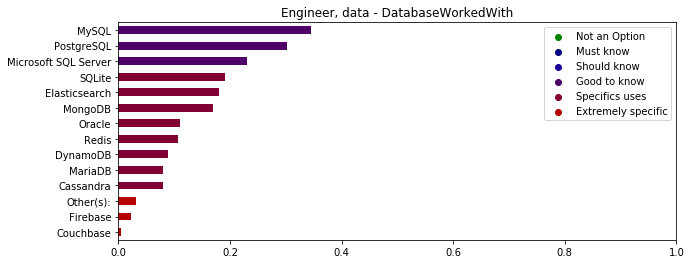

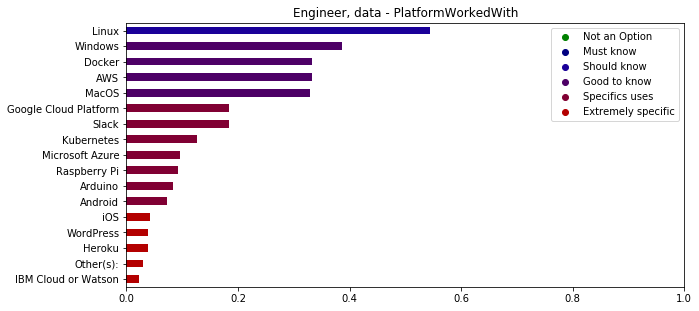

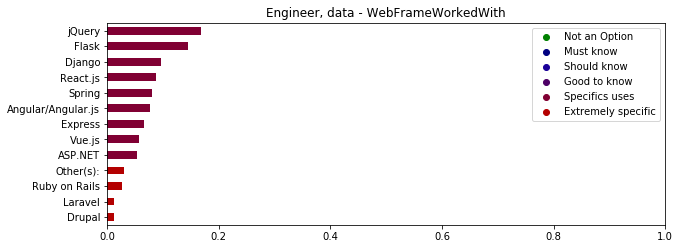

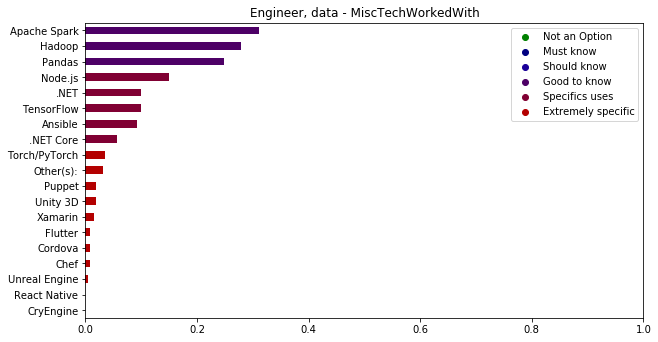

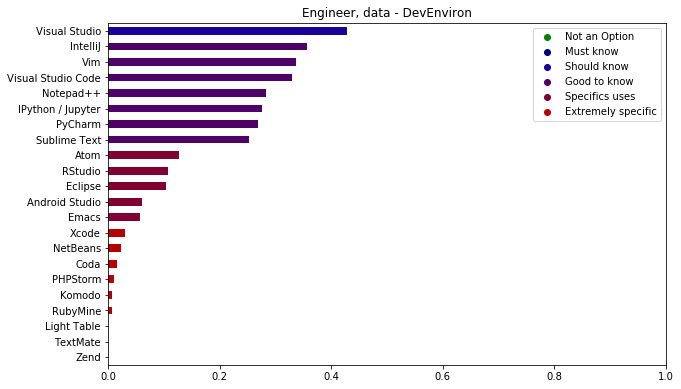

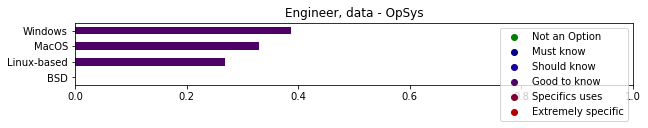

In [25]:
# Micro Segment Plot
for eachOutput in devtype_interest:
    groupedResults = df[df['datajobsCategoryMicro']==eachOutput].groupby(['datajobsCategoryMicro']).mean()
    for skill in columnsOptions:
            groupedSkill = groupedResults.reset_index()[columnsOptions[skill]].transpose().sort_values(0,ascending=True)
            colour = groupedSkill[0].apply(colourMap)
            ysize = groupedSkill.shape[0]/3.5
            groupedSkill.plot.barh(figsize=(10,ysize), color=colour)
            plt.title(eachOutput + ' - ' + skill)
            plt.xlim((0,1))
            
            legendPlot_100 = plt.scatter([-1], [-1], color=colourMap(0.90))
            legendPlot_80l = plt.scatter([-1], [-1], color=colourMap(0.70))
            legendPlot_60l = plt.scatter([-1], [-1], color=colourMap(0.50))
            legendPlot_40l = plt.scatter([-1], [-1], color=colourMap(0.30))
            legendPlot_20l = plt.scatter([-1], [-1], color=colourMap(0.10))
            legendPlot_05l = plt.scatter([-1], [-1], color=colourMap(0.04))
            plt.legend((legendPlot_100,legendPlot_80l,legendPlot_60l,legendPlot_40l,legendPlot_20l,legendPlot_05l),
                       ('Not an Option','Must know','Should know','Good to know','Specifics uses','Extremely specific'))
            
            plt.show()


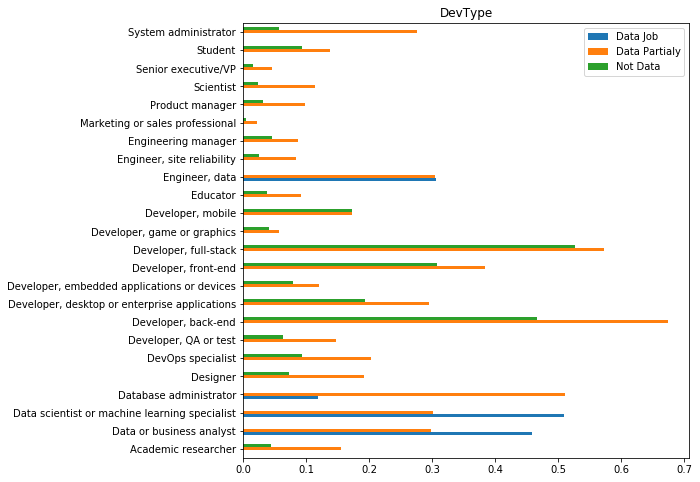

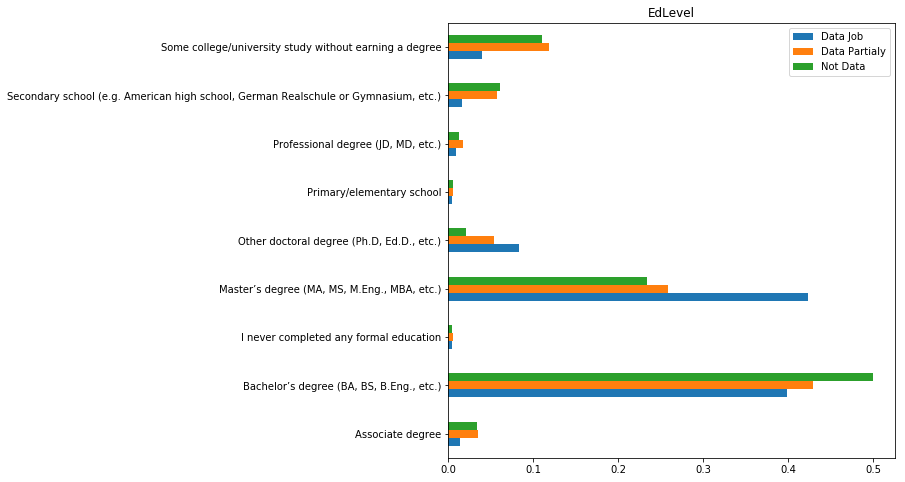

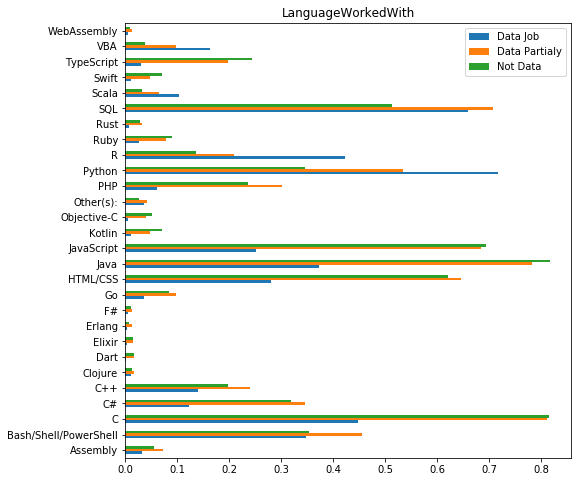

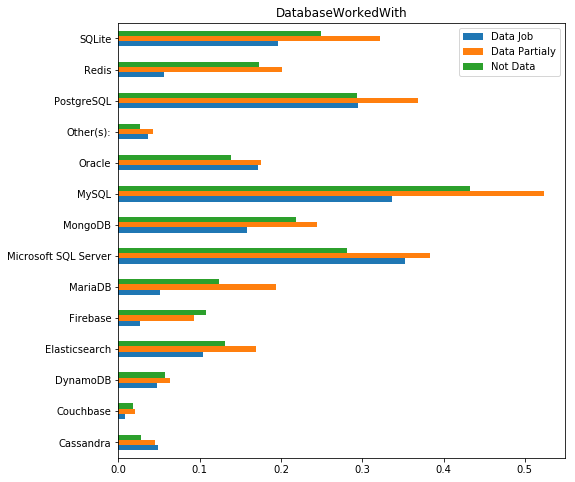

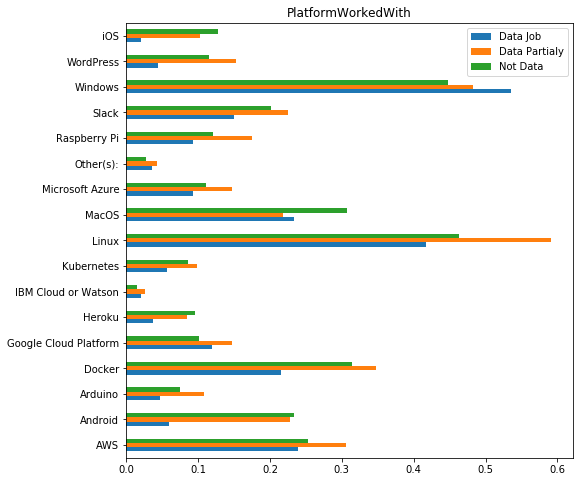

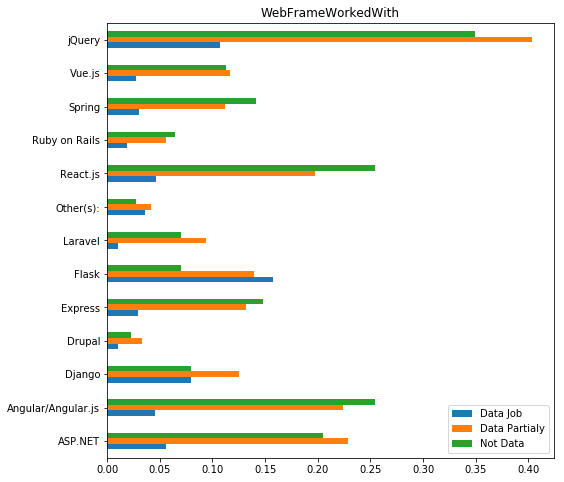

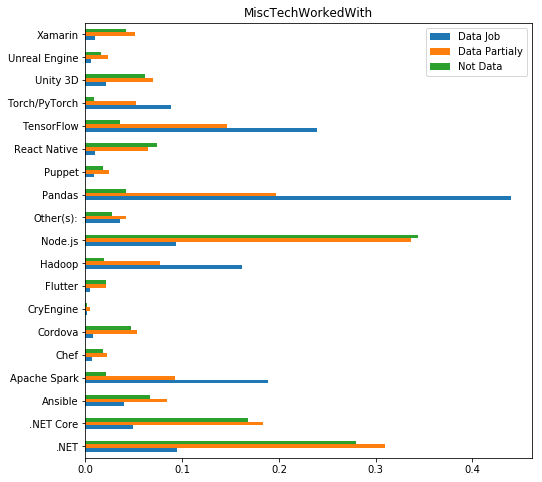

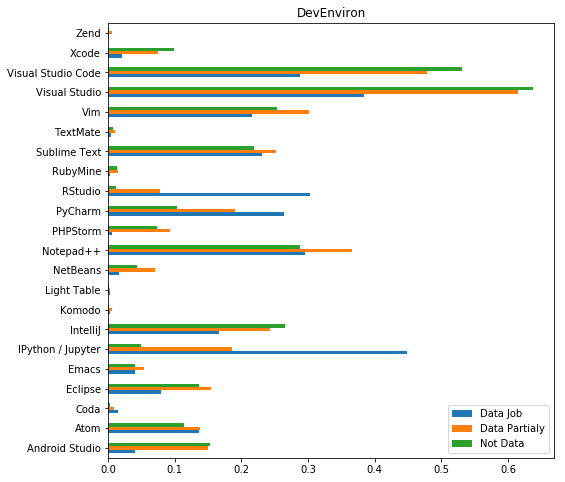

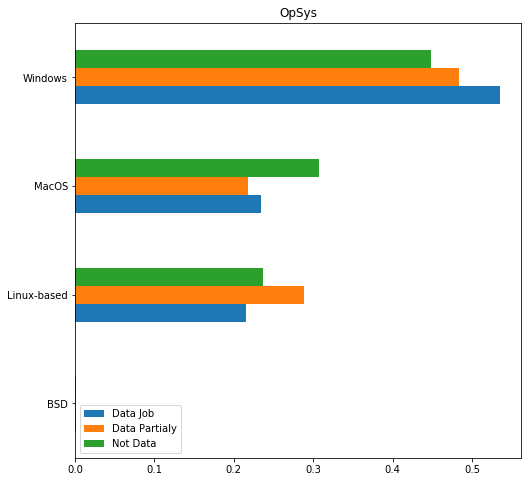

In [21]:
# MACRO SEGMENT PLOT
groupedResults = df.groupby(['datajobsCategoryMacro']).mean()
for skill in columnsOptions:
        groupedResults.reset_index()[columnsOptions[skill]].transpose().plot.barh(figsize=(8,8))
        plt.legend(groupedResults.index)
        plt.title(skill)
        plt.show()


### Article resume for each job type
 - **Data or business analyst**  
     (WRITE AN RESUME <<<<<------------------)
 - **Data scientist or machine learning specialist**
 - **Database administrator**
 - **Engineer, data**

### Article structure for information link

#### LanguageWorkedWith
 - [Assembly]()
 - [Bash/Shell/PowerShell]()
 - [C]()
 - [C#]()
 - [C++]()
 - [Clojure]()
 - [Dart]()
 - [Elixir]()
 - [Erlang]()
 - [F#]()
 - [Go]()
 - [HTML/CSS]()
 - [Java]()
 - [JavaScript]()
 - [Kotlin]()
 - [Objective-C]()
 - [PHP]()
 - [Python]()
 - [R]()
 - [Ruby]()
 - [Rust]()
 - [SQL]()
 - [Scala]()
 - [Swift]()
 - [TypeScript]()
 - [VBA]()
 - [WebAssembly]()

#### DatabaseWorkedWith
 - [Cassandra]()
 - [Couchbase]()
 - [DynamoDB]()
 - [Elasticsearch]()
 - [Firebase]()
 - [MariaDB]()
 - [Microsoft SQL Server]()
 - [MongoDB]()
 - [MySQL]()
 - [Oracle]()
 - [PostgreSQL]()
 - [Redis]()
 - [SQLite]()

#### PlatformWorkedWith
 - [AWS]()
 - [Android]()
 - [Arduino]()
 - [Docker]()
 - [Google Cloud Platform]()
 - [Heroku]()
 - [IBM Cloud or Watson]()
 - [Kubernetes]()
 - [Linux]()
 - [MacOS]()
 - [Microsoft Azure]()
 - [Raspberry Pi]()
 - [Slack]()
 - [Windows]()
 - [WordPress]()
 - [iOS]()

#### WebFrameWorkedWith
 - [ASP.NET]()
 - [Angular/Angular.js]()
 - [Django]()
 - [Drupal]()
 - [Express]()
 - [Flask]()
 - [Laravel]()
 - [React.js]()
 - [Ruby on Rails]()
 - [Spring]()
 - [Vue.js]()
 - [jQuery]()

#### MiscTechWorkedWith
 - [.NET]()
 - [.NET Core]()
 - [Ansible]()
 - [Apache Spark]()
 - [Chef]()
 - [Cordova]()
 - [CryEngine]()
 - [Flutter]()
 - [Hadoop]()
 - [Node.js]()
 - [Pandas]()
 - [Puppet]()
 - [React Native]()
 - [TensorFlow]()
 - [Torch/PyTorch]()
 - [Unity 3D]()
 - [Unreal Engine]()
 - [Xamarin]()

#### DevEnviron
 - [Android Studio]()
 - [Atom]()
 - [Coda]()
 - [Eclipse]()
 - [Emacs]()
 - [IPython / Jupyter]()
 - [IntelliJ]()
 - [Komodo]()
 - [Light Table]()
 - [NetBeans]()
 - [Notepad++]()
 - [PHPStorm]()
 - [PyCharm]()
 - [RStudio]()
 - [RubyMine]()
 - [Sublime Text]()
 - [TextMate]()
 - [Vim]()
 - [Visual Studio]()
 - [Visual Studio Code]()
 - [Xcode]()
 - [Zend]()

#### OpSys
 - [BSD]()
 - [Linux-based]()
 - [MacOS]()
 - [Windows]()

## Question 2: How is the distribution of Salary, for each type of data job in the top 10 countries?

### Transforming Salary
    The salary varies by country, currency, frequency of payment and hours worked. To make an fair metric, we will create the DollarPerHour variable and segment our analysis by country. This way our measurement will be fair.

In [32]:
weeksInYear = 52
df['DollarPerHour'] = df['ConvertedComp']/df['WorkWeekHrs']/weeksInYear

In [53]:
# Filtering data Jobs
dfSalary = df[df['datajobsCategoryMacro']=='Data Job']

# Clearing null data
dfSalary = dfSalary.dropna( subset = ['Country','DollarPerHour'])

In [54]:
topCountry = dfSalary['Country'].value_counts().head(20)

In [71]:
#dfSalary[dfSalary['Country']=='United States'].sort_values('DollarPerHour')[['ConvertedComp', 'WorkWeekHrs','DollarPerHour']]

In [78]:
(9000/22/8/5)

10.227272727272727

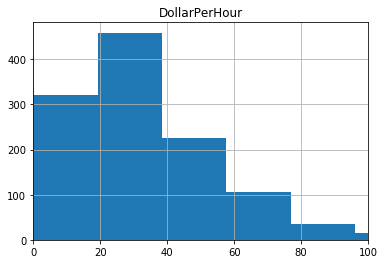

In [76]:
dfSalary['DollarPerHour'].hist(bins=50)
plt.title('DollarPerHour')
plt.xlim(0,100)
plt.show()

100.0


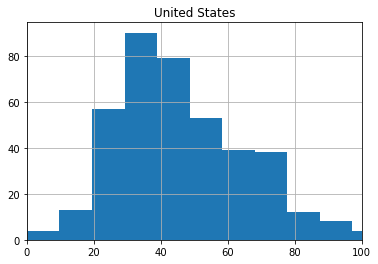

91.7094644167


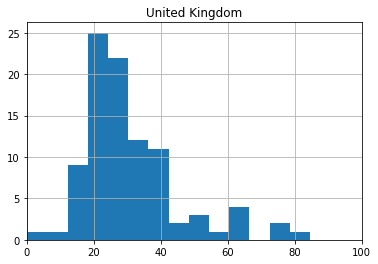

558.43459614


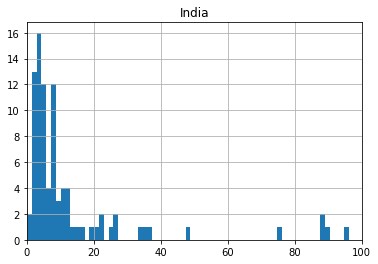

56.2470544598


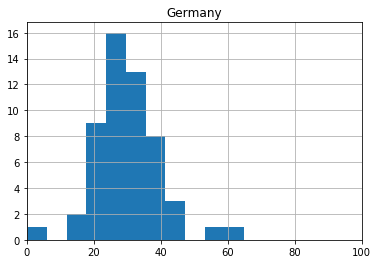

44.4444444444


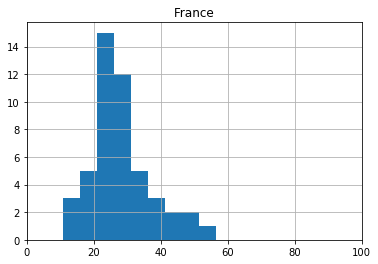

55.2635589162


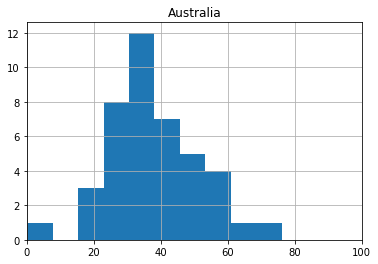

72.774907212


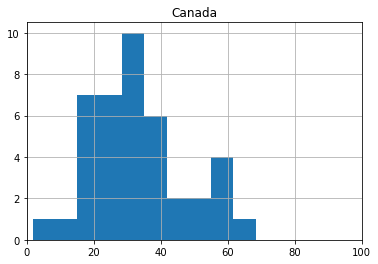

50.0000831238


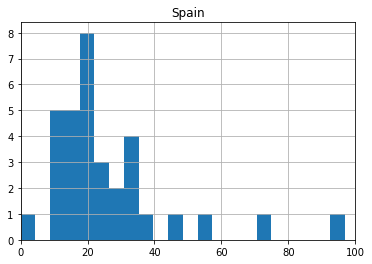

77.0250611651


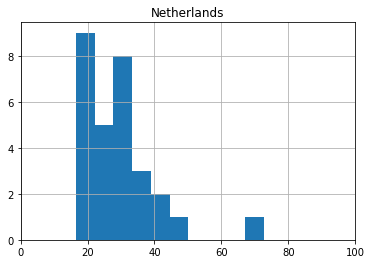

47.6466737688


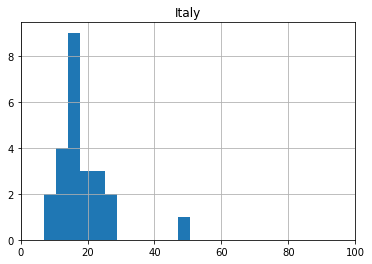

15.0788548282


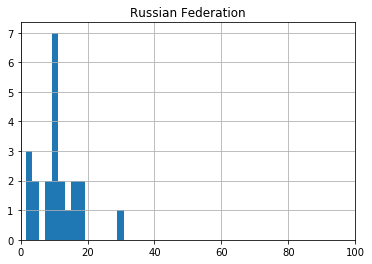

22.2222222222


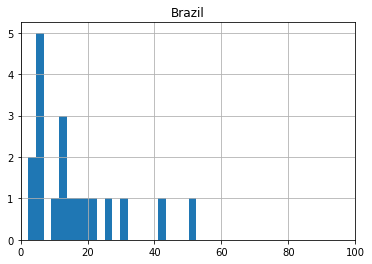

52.2224968529


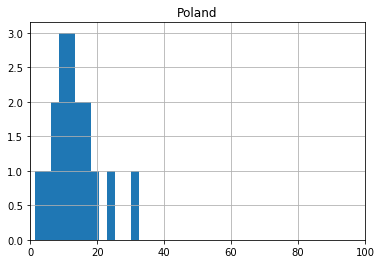

49.2999408401


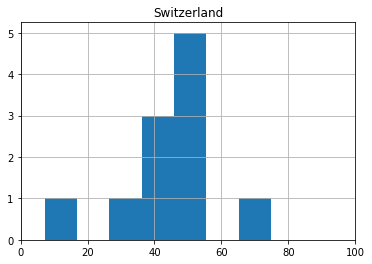

55.2769082171


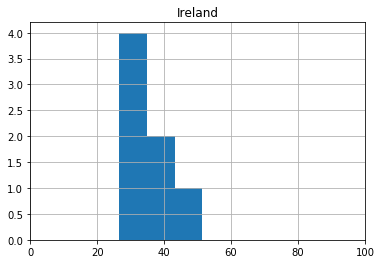

6.15361656485


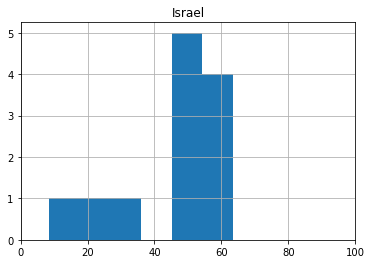

8.6069130813


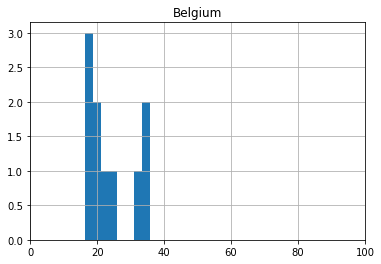

7.8065804775


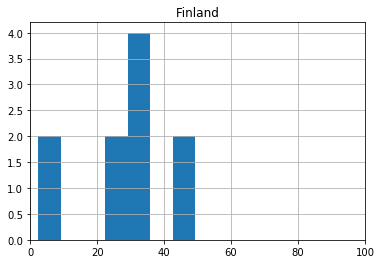

9.55741869919


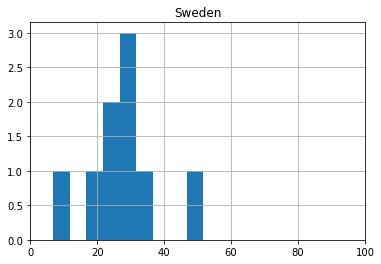

55.7591686157


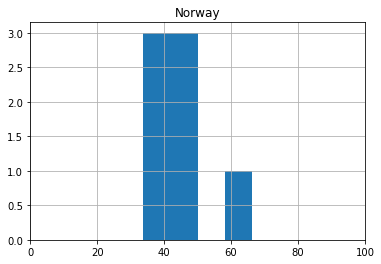

In [88]:
for country in topCountry.index:
    tempdfSalary = dfSalary[dfSalary['Country']==country]['DollarPerHour']
    nbins = 5*tempdfSalary.max()/tempdfSalary.median()
    print(nbins)
    tempdfSalary.hist(bins=int(nbins))
    plt.title(country)
    plt.xlim(0,100)
    plt.show()
    

In [26]:
dataJobsOutputs

['Data or business analyst',
 'Data scientist or machine learning specialist',
 'Database administrator',
 'Engineer, data',
 'Data Misture',
 'Data Partialy',
 'Not Data']

# WIP --------------------------

### Creating Simple Model

Separating into training and test

In [ ]:
df['YearsCodeProFix'] = df['YearsCodePro'].apply(cleaningYearsOfCode)
df['YearsCodeProFix'].head()

In [145]:
tempList = getOptionOfMultipleSelection(df,'Country')
tempList.sort()
columnsOptions['Country'] = tempList

dfSalaryClean = transformingColumnByOptions(dfSalaryClean, 'Country', columnsOptions['Country']).copy()

In [174]:
modelColumnsPrep =[
    'DevType'
    ,'Country'
    #,'EdLevel'
    #,'LanguageWorkedWith'
    #,'DatabaseWorkedWith'
    #,'PlatformWorkedWith'
    #,'WebFrameWorkedWith'
    #,'MiscTechWorkedWith'
    #,'DevEnviron'
    #,'OpSys'
]

    
targetColumns = ['DollarPerHour']

modelColumns = [
    'YearsCodeProFix' 
]

for each in modelColumnsPrep:
    for item in columnsOptions[each]:
        modelColumns.append(item)
# modelColumns

In [175]:
# MinMaxScaler
# scaler = MinMaxScaler() # default=(0, 1)
# features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
# features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])


In [176]:
dfSalaryClean[targetColumns].head()

,DollarPerHour
2,4.240385
3,14.663462
5,469.769231
8,57.198918
9,3.651923


In [177]:
dfSalaryClean.shape

(50022, 400)

In [178]:
dfSalaryClean[modelColumns].head()

,YearsCodeProFix,Academic researcher,Data or business analyst,Data scientist or machine learning specialist,Database administrator,Designer,DevOps specialist,"Developer, QA or test","Developer, back-end","Developer, desktop or enterprise applications",...,United Kingdom,United Republic of Tanzania,United States,Uruguay,Uzbekistan,"Venezuela, Bolivarian Republic of...",Viet Nam,Yemen,Zambia,Zimbabwe
2,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0.5,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,3,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4,0,0,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
9,10,0,1,1,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [179]:
X_train, X_test, y_train, y_test = train_test_split(dfSalaryClean[modelColumns], 
                                                    dfSalaryClean[targetColumns], 
                                                    test_size = 0.2, 
                                                    random_state = 0)

In [189]:
model = {}
model['LinearRegression'] = {'model':LinearRegression()}
model['Lasso'] = {'model':Lasso()}
model['DecisionTreeRegressor'] = {'model':DecisionTreeRegressor(min_samples_split=20,max_depth=5)}

In [190]:
for eachModel in model:
    model[eachModel]['model'].fit(X_train, y_train)
    model[eachModel]['predTrain'] = model[eachModel]['model'].predict(X_train)
    model[eachModel]['predTest'] = model[eachModel]['model'].predict(X_test)
    model[eachModel]['trainR2'] = r2_score( y_train, model[eachModel]['predTrain'] )
    model[eachModel]['testR2'] = r2_score( y_test, model[eachModel]['predTest'] )
    print(eachModel + ' - R2Train: ' + str(model[eachModel]['trainR2']) + ' R2Test: ' + str(model[eachModel]['testR2']) )

LinearRegression - R2Train: 0.08881975663 R2Test: -7.47575570745e+15
Lasso - R2Train: 0.0694197493858 R2Test: 0.0247989116324
DecisionTreeRegressor - R2Train: 0.0814668120121 R2Test: 0.0242336176273


In [182]:
# r2_score, mean_squared_error

In [183]:
y_test.head()

,DollarPerHour
44585,62.500000
19627,21.669231
76697,1.076923
67942,7.003846
64084,30.769231


In [184]:
model['Lasso']['predTest']

array([ 116.43408413,   34.84508724,   38.41127535, ...,   37.22254598,
         35.0332618 ,   32.12031389])